### Speed Dating Case Study

For this project we are using a dataset that was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment. 
 
Ref. & Data Source: Columbia University 
(http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/) 

As part of their study the subjects were asked to fill a survey when they signed up for the Speed Dating Event and fill a scorecard on various attributes on each of their potential matches. At the end of the night subjects were matched with potential partners if both persons said yes. This experiment was conducted on various days with different groups of people, referred to as waves, and collated into one dataset.

The subjects were further followed up with and asked additional questions after the event and matches but since the purpose of our study is to predict matches we will discard all that infomation. It would not be appropriate to predict matches with future information we will only use the information available up to the point of the match. 

Data Subset Upto Match:
We have used excel to drop the initial columns and subset our data upto the point of match. We have also dropped some other irrelevant columns which would not impact match (based on domain knowledge and logic) such as the station number, partner id, etc. Additionally we have also dropped the instances from waves 6-9 as they are on a different scale.



In [1]:
# we start with importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier, IsolationForest
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)


##Mute the warnings
import warnings as w
w.filterwarnings('ignore')

In [2]:
# importing the data 
file = r'~/Downloads/Speed_Dating_Final_Data.xlsx'


In [3]:
data_og = pd.read_excel(file)


In [4]:
# reading the data into the pandas dataframe
data = data_og


# Exploratory Data Analysis

- We will do some exploratory data analysis and just see what the dataset looks like. This will give us an overview of the no of datapoints, attributes, datatypes, general description, etc. 
- We will also perform data cleaning in this step, so that we have a workable dataset. This involves checking for null values, replacing them if necessary, etc.
- At this stage we will also use different plots to visualize the data. - Visuals help us perform the initial high-level analysis. 

In [5]:
# lets have a preliminary look at the data
data.head()

match  gender  round  int_corr  samerace  age_o  pf_o_att  pf_o_sin  \
0      0       0     10      0.14         0   27.0      35.0      20.0   
1      0       0     10      0.54         0   22.0      60.0       0.0   
2      1       0     10      0.16         1   22.0      19.0      18.0   
3      1       0     10      0.61         0   23.0      30.0       5.0   
4      1       0     10      0.21         0   24.0      30.0      10.0   

   pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha  attr_o  sinc_o  intel_o  fun_o  \
0      20.0      20.0       0.0       5.0     6.0     8.0      8.0    8.0   
1       0.0      40.0       0.0       0.0     7.0     8.0     10.0    7.0   
2      19.0      18.0      14.0      12.0    10.0    10.0     10.0   10.0   
3      15.0      40.0       5.0       5.0     7.0     8.0      9.0    8.0   
4      20.0      10.0      10.0      20.0     8.0     7.0      9.0    6.0   

   amb_o  shar_o  like_o   age field undergra  mn_sat  tuition  \
0    8.0     6.0     7.0  21.0   Law      NaN     NaN      NaN   
1    7.0     5.0     8.0  21.0   Law      NaN     NaN      NaN   
2   10.0    10.0    10.0  21.0   Law      NaN     NaN      NaN   
3    9.0     8.0     7.0  21.0   Law      NaN     NaN      NaN   
4    9.0     7.0     8.0  21.0   Law      NaN     NaN      NaN   

                                    race  imprace  imprelig     from   income  \
0  Asian/Pacific-Islander/Asian-American      2.0       4.0  Chicago  69487.0   
1  Asian/Pacific-Islander/Asian-American      2.0       4.0  Chicago  69487.0   
2  Asian/Pacific-Islander/Asian-American      2.0       4.0  Chicago  69487.0   
3  Asian/Pacific-Islander/Asian-American      2.0       4.0  Chicago  69487.0   
4  Asian/Pacific-Islander/Asian-American      2.0       4.0  Chicago  69487.0   

              goal          date  career  sports  tvsports  exercise  dining  \
0  Meet new people  Almost Never  lawyer     9.0       2.0       8.0     9.0   
1  Meet new people  Almost Never  lawyer     9.0       2.0       8.0     9.0   
2  Meet new people  Almost Never  lawyer     9.0       2.0       8.0     9.0   
3  Meet new people  Almost Never  lawyer     9.0       2.0       8.0     9.0   
4  Meet new people  Almost Never  lawyer     9.0       2.0       8.0     9.0   

   museums  art  hiking  gaming  clubbing  reading   tv  theater  movies  \
0      1.0  1.0     5.0     1.0       5.0      6.0  9.0      1.0    10.0   
1      1.0  1.0     5.0     1.0       5.0      6.0  9.0      1.0    10.0   
2      1.0  1.0     5.0     1.0       5.0      6.0  9.0      1.0    10.0   
3      1.0  1.0     5.0     1.0       5.0      6.0  9.0      1.0    10.0   
4      1.0  1.0     5.0     1.0       5.0      6.0  9.0      1.0    10.0   

   concerts  music  shopping  yoga  exphappy  expnum  attr1_1  sinc1_1  \
0      10.0    9.0       8.0   1.0       3.0     2.0     15.0     20.0   
1      10.0    9.0       8.0   1.0       3.0     2.0     15.0     20.0   
2      10.0    9.0       8.0   1.0       3.0     2.0     15.0     20.0   
3      10.0    9.0       8.0   1.0       3.0     2.0     15.0     20.0   
4      10.0    9.0       8.0   1.0       3.0     2.0     15.0     20.0   

   intel1_1  fun1_1  amb1_1  shar1_1  attr2_1  sinc2_1  intel2_1  fun2_1  \
0      20.0    15.0    15.0     15.0     35.0     20.0      15.0    20.0   
1      20.0    15.0    15.0     15.0     35.0     20.0      15.0    20.0   
2      20.0    15.0    15.0     15.0     35.0     20.0      15.0    20.0   
3      20.0    15.0    15.0     15.0     35.0     20.0      15.0    20.0   
4      20.0    15.0    15.0     15.0     35.0     20.0      15.0    20.0   

   amb2_1  shar2_1  attr3_1  sinc3_1  fun3_1  intel3_1  amb3_1  attr5_1  \
0     5.0      5.0      6.0      8.0     8.0       8.0     7.0      NaN   
1     5.0      5.0      6.0      8.0     8.0       8.0     7.0      NaN   
2     5.0      5.0      6.0      8.0     8.0       8.0     7.0      NaN   
3     5.0      5.0      6.0      8.0     8.0       8.0     7.0      NaN

In [6]:
# now we  see the size of the dataset
data.shape # we can see that we have 87 attributes and 1 target(match) column

(6816, 84)

In [7]:
# distribution of match
data['match'].value_counts()

0    5692
1    1124
Name: match, dtype: int64

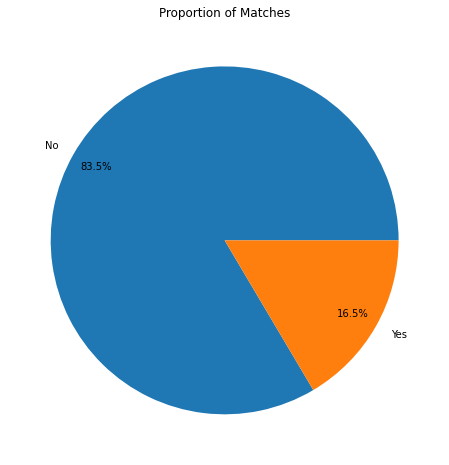

In [8]:
# lets visualize the above numbers
sizes = dict(data['match'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Proportion of Matches")
plt.pie(sizes.values(), labels=['No', 'Yes'], autopct="%.1f%%", pctdistance=0.85)

plt.show()

From the above chart we can see that we have a workable distribution, if not ideal, for the dataset. We will decide whether we wish to resample the data at a later stage. 

###### - We will first check for null values and then replace them with the mean of their column or decide to drop them depending on various factors. We will also check for object types. 

In [9]:
data.isnull().any().value_counts()

True     76
False     8
dtype: int64

In [10]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

field       214
undergra    241
race          5
from        227
goal          6
date          7
career      315
dtype: int64

#### We have 78 columns with null values and 7 object type columns. Based on the proportion of null values we will decide to retain or replace values. 

In [11]:
# looking at the proportion of missing values
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})

In [12]:
missing_value_df

column_name  percent_missing
match          match         0.000000
gender        gender         0.000000
round          round         0.000000
int_corr    int_corr         2.171362
samerace    samerace         0.000000
age_o          age_o         1.452465
pf_o_att    pf_o_att         1.232394
pf_o_sin    pf_o_sin         1.232394
pf_o_int    pf_o_int         1.232394
pf_o_fun    pf_o_fun         1.364437
pf_o_amb    pf_o_amb         1.496479
pf_o_sha    pf_o_sha         1.819249
attr_o        attr_o         2.992958
sinc_o        sinc_o         3.858568
intel_o      intel_o         4.049296
fun_o          fun_o         4.474765
amb_o          amb_o         8.714789
shar_o        shar_o        12.529343
like_o        like_o         3.257042
age              age         1.320423
field          field         0.850939
undergra    undergra        27.904930
mn_sat        mn_sat        54.034624
tuition      tuition        47.432512
race            race         0.000000
imprace      imprace         1.085681
imprelig    imprelig         1.085681
from            from         1.085681
income        income        50.953638
goal            goal         0.000000
date            date         0.000000
career        career         1.232394
sports        sports         1.085681
tvsports    tvsports         1.085681
exercise    exercise         1.085681
dining        dining         1.085681
museums      museums         1.085681
art              art         1.085681
hiking        hiking         1.085681
gaming        gaming         1.085681
clubbing    clubbing         1.085681
reading      reading         1.085681
tv                tv         1.085681
theater      theater         1.085681
movies        movies         1.085681
concerts    concerts         1.085681
music          music         1.085681
shopping    shopping         1.085681
yoga            yoga         1.085681
exphappy    exphappy         1.408451
expnum        expnum        73.591549
attr1_1      attr1_1         1.085681
sinc1_1      sinc1_1         1.085681
intel1_1    intel1_1         1.085681
fun1_1        fun1_1         1.232394
amb1_1        amb1_1         1.379108
shar1_1      shar1_1         1.701878
attr2_1      attr2_1         1.085681
sinc2_1      sinc2_1         1.085681
intel2_1    intel2_1         1.085681
fun2_1        fun2_1         1.085681
amb2_1        amb2_1         1.232394
shar2_1      shar2_1         1.232394
attr3_1      attr3_1         1.467136
sinc3_1      sinc3_1         1.467136
fun3_1        fun3_1         1.467136
intel3_1    intel3_1         1.467136
amb3_1        amb3_1         1.467136
attr5_1      attr5_1        28.022300
sinc5_1      sinc5_1        28.022300
intel5_1    intel5_1        28.022300
fun5_1        fun5_1        28.022300
amb5_1        amb5_1        28.022300
dec              dec         0.000000
attr            attr         2.846244
sinc            sinc         3.711854
intel          intel         3.902582
fun              fun         4.328052
amb              amb         8.568075
shar            shar        12.397300
like            like         3.110329
prob            prob         3.961268
met              met         4.885563
match_es    match_es         7.893192

There are several clumns with a large proportion of missing values, if we use random or average values for these large proportions it would lead to our data being biased or skewed and consequently a poor model. Therefore we will first check if these columns are highly correlated to our target column, if not we will drop the columns with more than 20% missing values. 

In [13]:
## Correlation with the default variable
corr_match = data.corrwith(data['match'],method = 'spearman')

# https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8

In [14]:
corr_match

match       1.000000
gender     -0.000652
round      -0.032430
int_corr    0.033231
samerace    0.031892
age_o      -0.045881
pf_o_att   -0.005251
pf_o_sin   -0.032018
pf_o_int    0.027138
pf_o_fun    0.046453
pf_o_amb   -0.012571
pf_o_sha   -0.056167
attr_o      0.273458
sinc_o      0.167126
intel_o     0.178797
fun_o       0.295967
amb_o       0.138450
shar_o      0.281937
like_o      0.326910
age        -0.044876
mn_sat      0.034866
tuition     0.033260
imprace    -0.040690
imprelig   -0.017550
income      0.025436
sports      0.014821
tvsports   -0.012051
exercise    0.008688
dining      0.039968
museums     0.022230
art         0.037574
hiking      0.014753
gaming      0.018729
clubbing    0.058991
reading     0.009946
tv         -0.013102
theater     0.004539
movies     -0.018798
concerts    0.025447
music       0.026108
shopping    0.004703
yoga        0.028649
exphappy    0.022999
expnum      0.121364
attr1_1    -0.005918
sinc1_1    -0.031817
intel1_1    0.027529
fun1_1      0

We can see that none of our columns are individually higly correlated to out match column, therefore, we drop these columns. We will then replace the missing values in the remaining columns with the average of their columns.

In [15]:
# dropping columns with more than 20% missing values
data = data.drop(['undergra', 'mn_sat', 'tuition', 'income', 'expnum', 'attr5_1', 'sinc5_1', 
                  'intel5_1', 'fun5_1', 'amb5_1' ], axis=1)


In [16]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

field     214
race        5
from      227
goal        6
date        7
career    315
dtype: int64

In [17]:
# there are 3 object type columns with large no of unique values, it may be difficult to encode these and 
# too many categories in the columns may lead to overfitting of the data. We may perhaps at a later stage decide to 
# do a deeper cleaning of the data and bin/categorize them in a certain way, but for now we do not have the necessary 
# knowledge or information about them so for the purpose of our project we will drop them from out working data.
data = data.drop(['field', 'from', 'career' ], axis=1)

### Correlation Matrix

In [18]:
# Visualising the correlation matrix of the dataset.
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

### Outliers

In [19]:
data.describe()

match       gender        round     int_corr     samerace  \
count  6816.000000  6816.000000  6816.000000  6668.000000  6816.000000   
mean      0.164906     0.500734    16.859155     0.195789     0.390258   
std       0.371123     0.500036     4.441200     0.304068     0.487844   
min       0.000000     0.000000     6.000000    -0.730000     0.000000   
25%       0.000000     0.000000    14.000000    -0.020000     0.000000   
50%       0.000000     1.000000    18.000000     0.210000     0.000000   
75%       0.000000     1.000000    21.000000     0.430000     1.000000   
max       1.000000     1.000000    22.000000     0.910000     1.000000   

             age_o     pf_o_att     pf_o_sin     pf_o_int     pf_o_fun  \
count  6717.000000  6732.000000  6732.000000  6732.000000  6723.000000   
mean     26.289117    23.961000    17.298555    20.566772    17.355355   
std       3.582694    13.425856     7.700079     7.434063     6.646454   
min      18.000000     0.000000     0.000000     0.000000     0.000000   
25%      24.000000    15.000000    10.000000    18.000000    14.000000   
50%      26.000000    20.000000    20.000000    20.000000    18.000000   
75%      28.000000    30.000000    20.000000    25.000000    20.000000   
max      55.000000   100.000000    60.000000    50.000000    50.000000   

          pf_o_amb     pf_o_sha       attr_o       sinc_o      intel_o  \
count  6714.000000  6692.000000  6612.000000  6553.000000  6540.000000   
mean      9.746534    11.254819     6.162417     7.145430     7.334021   
std       6.124239     6.665661     1.956117     1.777385     1.564247   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     5.000000     5.000000     6.000000     6.000000   
50%      10.000000    10.000000     6.000000     7.000000     7.000000   
75%      15.000000    15.000000     7.000000     8.000000     8.000000   
max      53.000000    30.000000    10.500000    10.000000    10.000000   

             fun_o        amb_o       shar_o       like_o          age  \
count  6511.000000  6222.000000  5962.000000  6594.000000  6726.000000   
mean      6.375672     6.736017     5.425444     6.124386    26.281742   
std       1.972394     1.809780     2.184614     1.840707     3.586325   
min       0.000000     0.000000     0.000000     0.000000    18.000000   
25%       5.000000     6.000000     4.000000     5.000000    24.000000   
50%       7.000000     7.000000     5.000000     6.000000    26.000000   
75%       8.000000     8.000000     7.000000     7.000000    28.000000   
max      11.000000    10.000000    10.000000    10.000000    55.000000   

           imprace     imprelig       sports     tvsports     exercise  \
count  6742.000000  6742.000000  6742.000000  6742.000000  6742.000000   
mean      3.651735     3.651587     6.406408     4.540492     6.159745   
std       2.805632     2.818407     2.632639     2.837027     2.443151   
min       0.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     4.000000     2.000000     5.000000   
50%       3.000000     3.000000     7.000000     4.000000     6.000000   
75%       6.000000     6.000000     9.000000     7.000000     8.000000   
max      10.000000    10.000000    10.000000    10.000000    10.000000   

            dining      museums          art       hiking       gaming  \
count  6742.000000  6742.000000  6742.000000  6742.000000  6742.000000   
mean      7.808514     6.954761     6.710620     5.704835     3.848858   
std       1.761890     2.077393     2.292005     2.601069     2.617793   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       7.000000     6.000000     5.000000     3.000000     1.000000   
50%       8.000000     7.000000     7.000000     6.000000     3.000000   
75%       9.000000     8.000000     8.000000     8.000000     6.000000   
max      10.000000    10.000000    10.000000    10.000000    14.000000   

          c

- An outlier is a data point that is noticeably different from the rest. They represent errors in measurement, bad data collection, or simply show variables not considered when collecting the data.
- We can see from the above data that for several columns the mean value is very far from the min/max values. That means that there are outlers in the dataset.  
- In supervised models, outliers can deceive the training process resulting in prolonged training times, or leading to the development of less precise models.
- An outlier is nothing but a data point that differs significantly from other data points in the given dataset.

<AxesSubplot:>

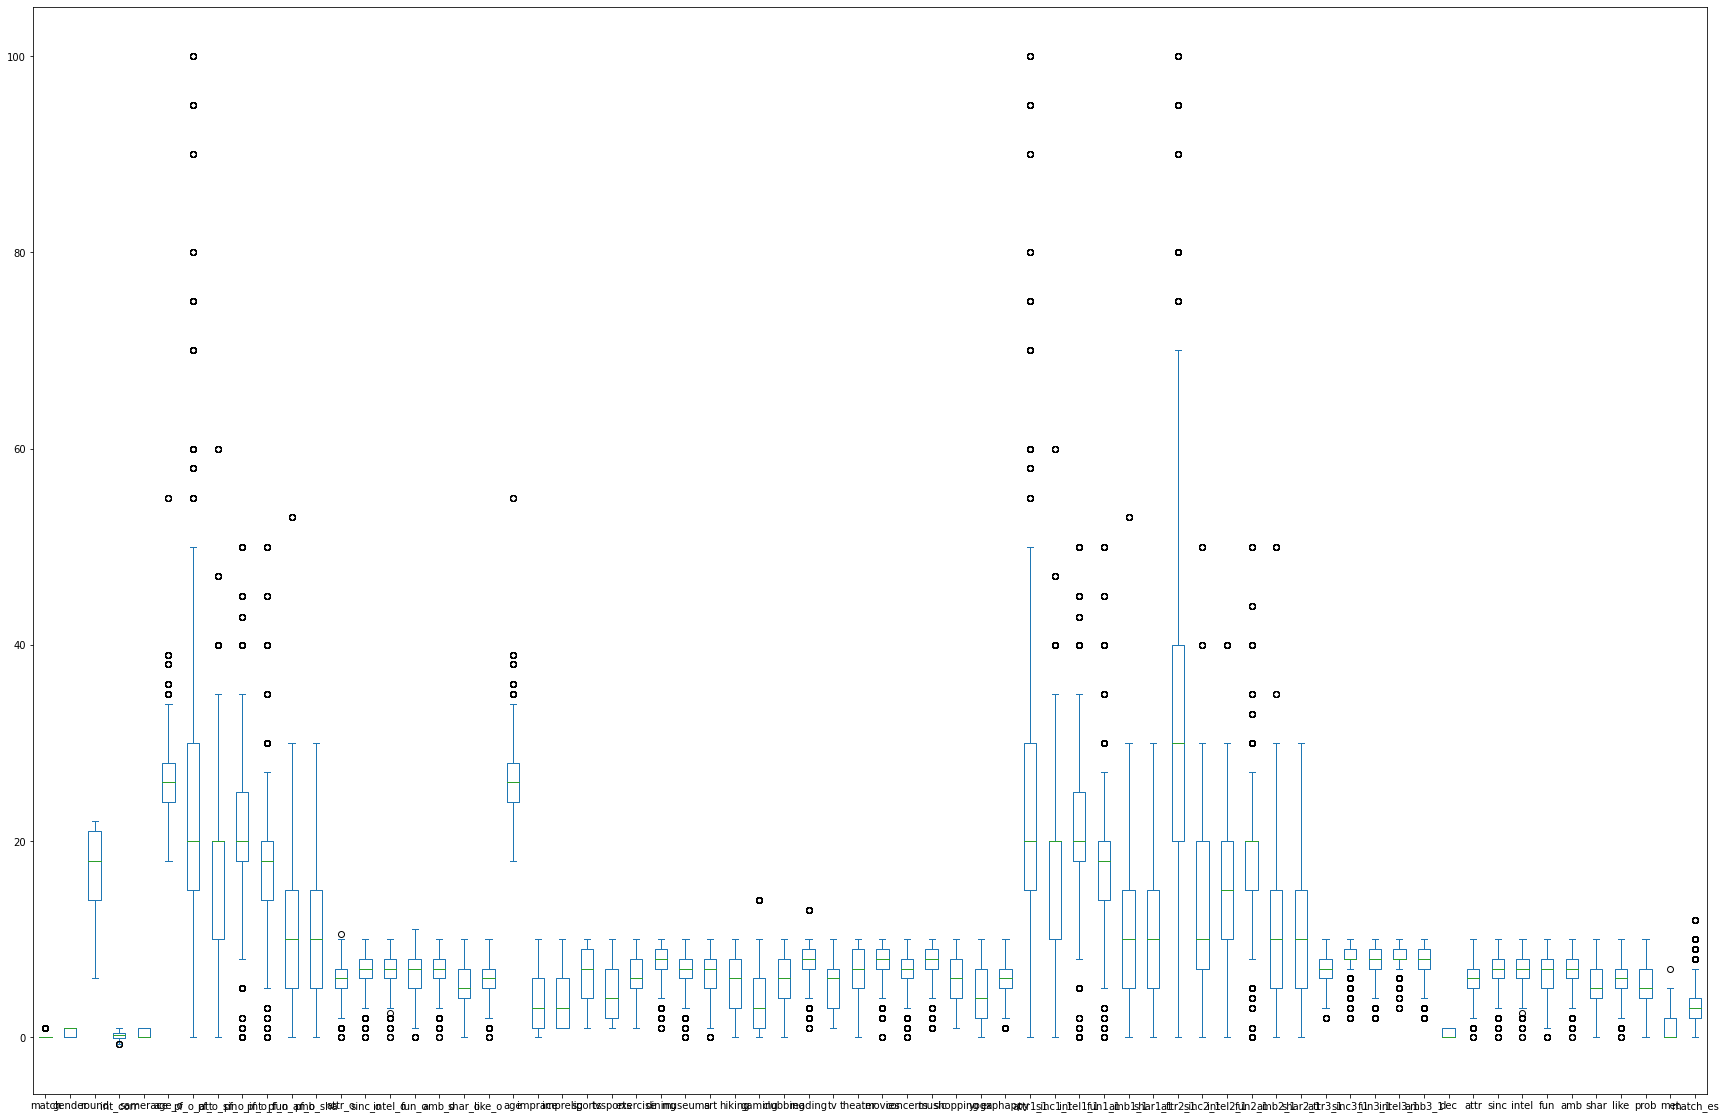

In [20]:
data.plot(kind='box', figsize = (30,20))

In [21]:
df = data.select_dtypes(exclude=['object'])

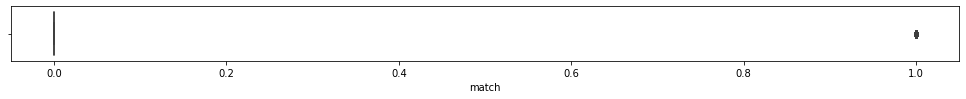

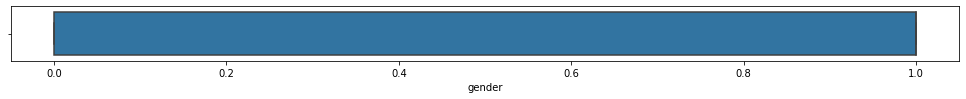

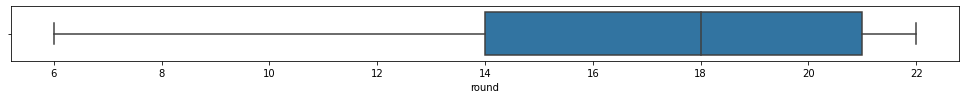

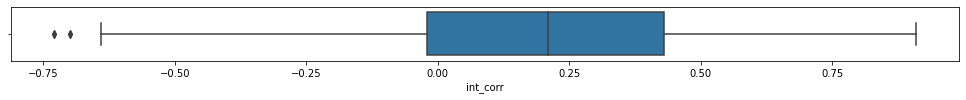

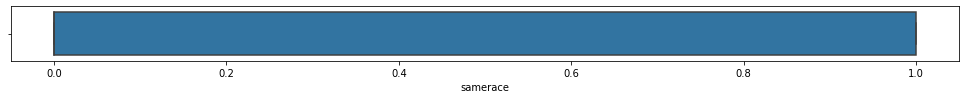

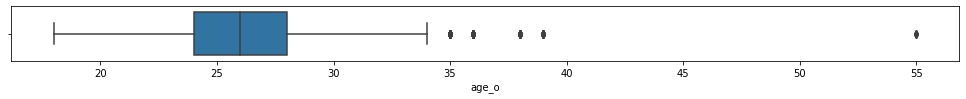

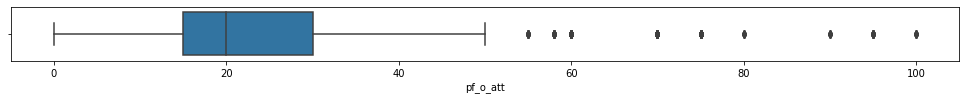

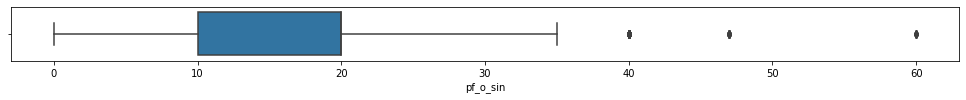

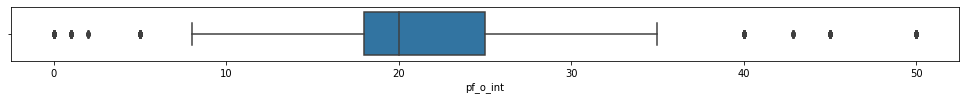

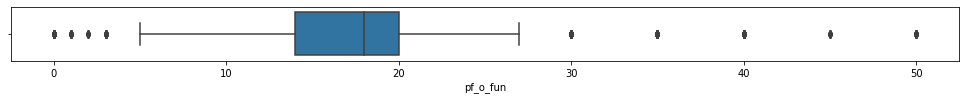

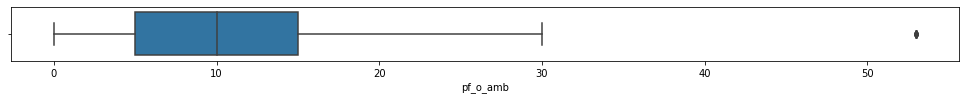

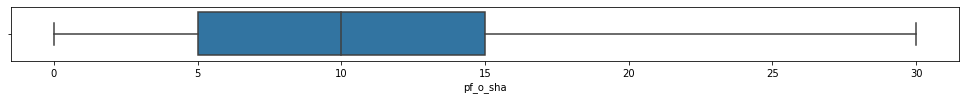

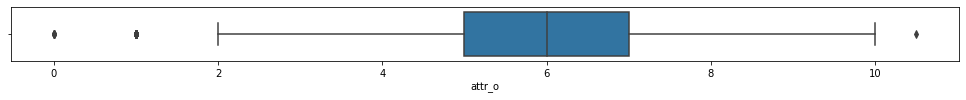

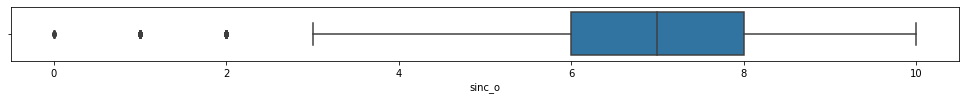

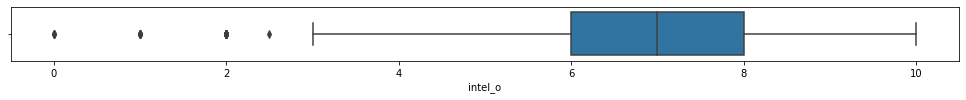

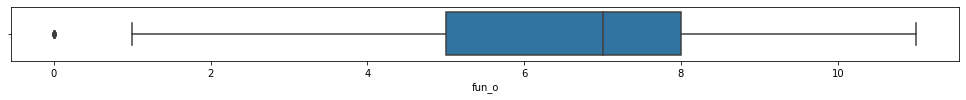

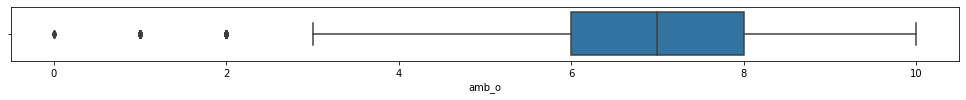

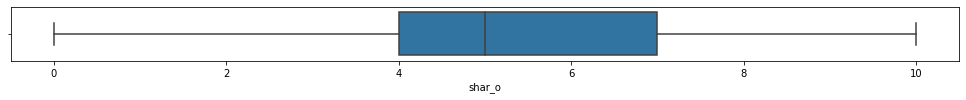

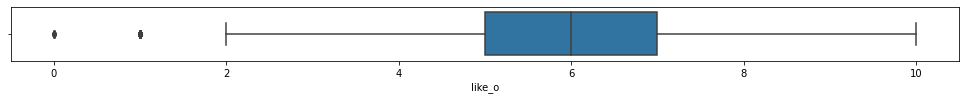

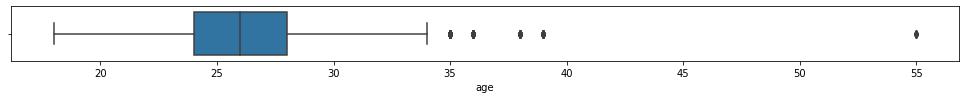

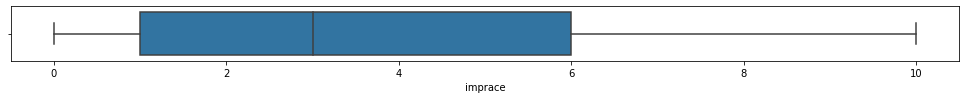

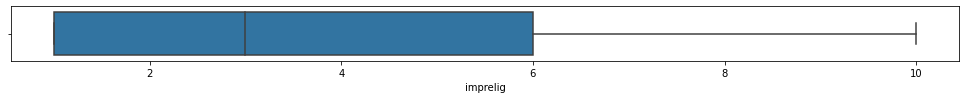

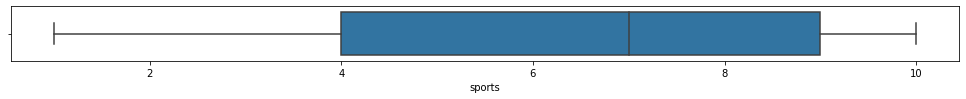

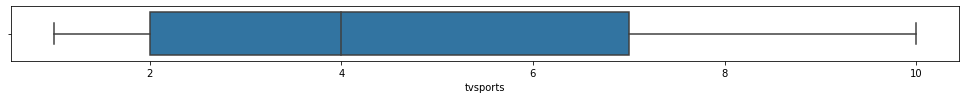

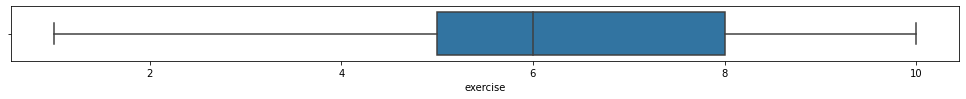

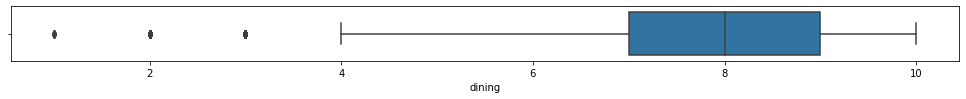

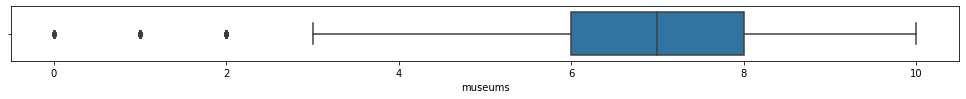

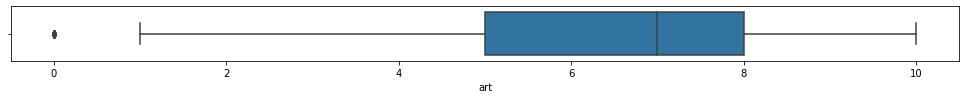

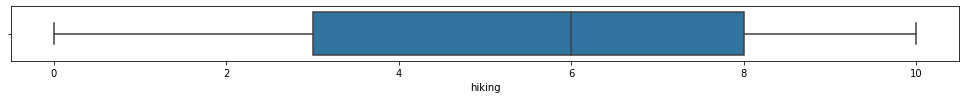

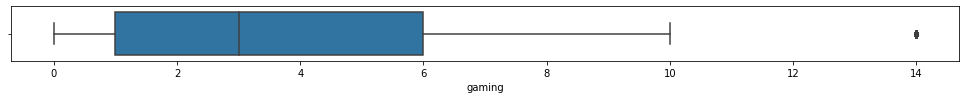

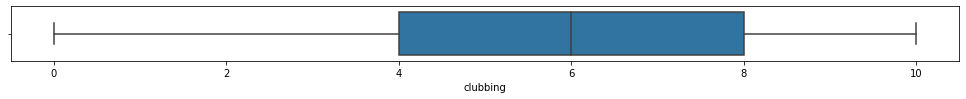

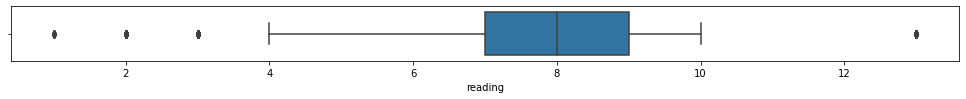

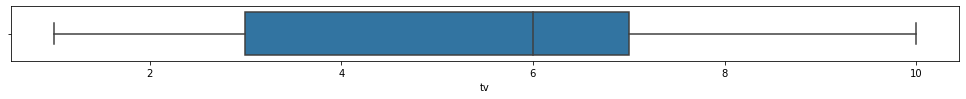

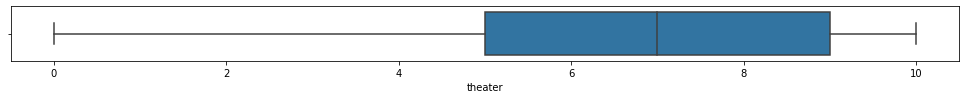

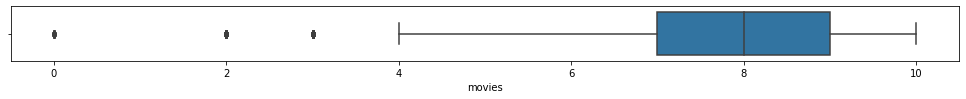

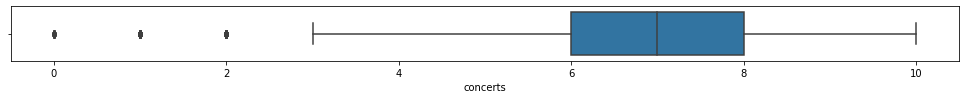

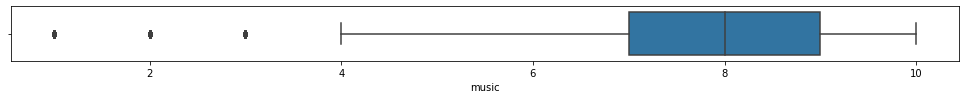

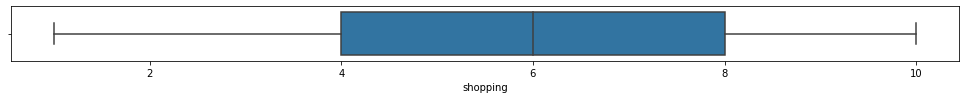

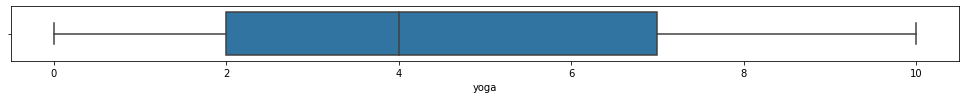

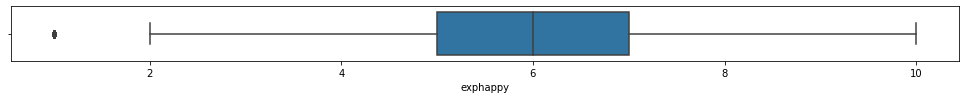

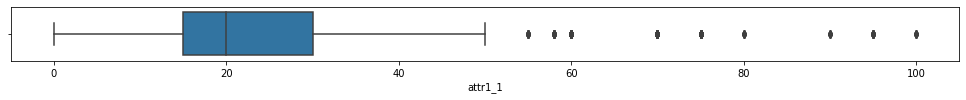

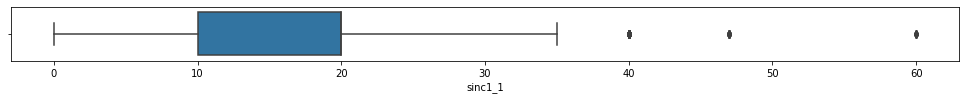

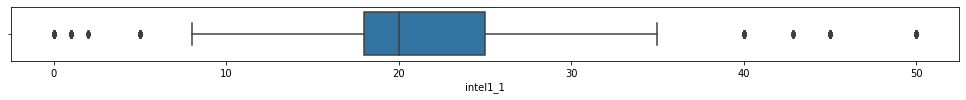

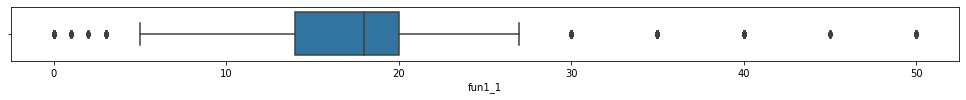

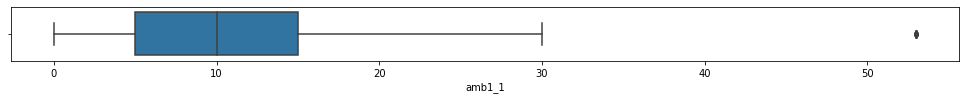

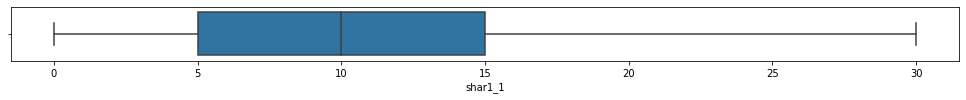

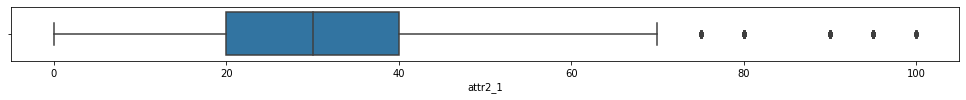

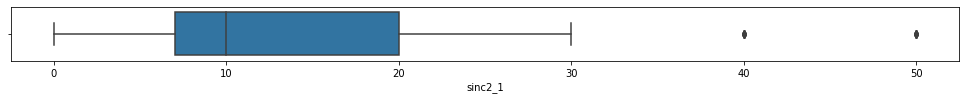

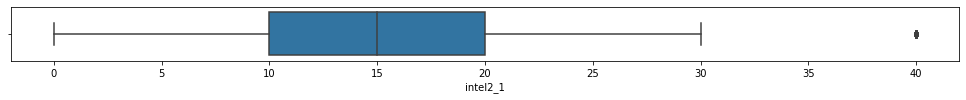

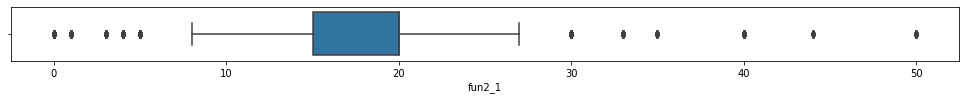

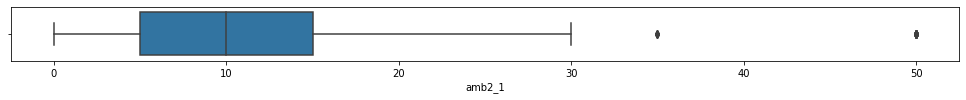

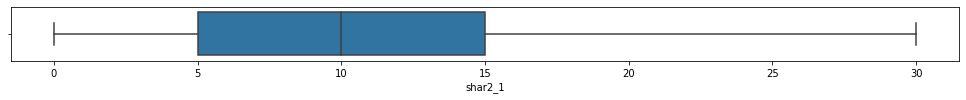

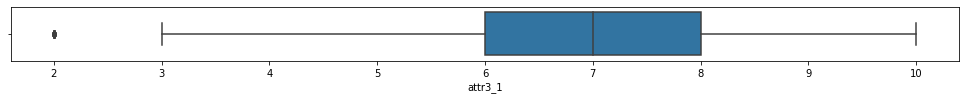

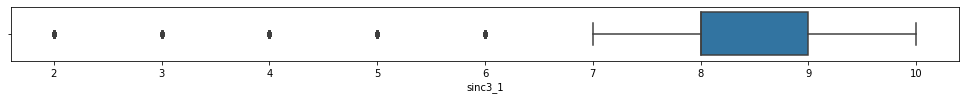

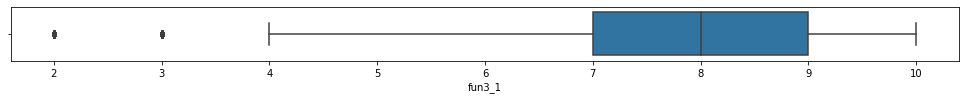

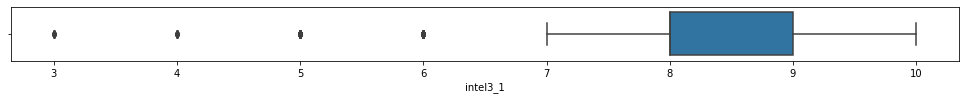

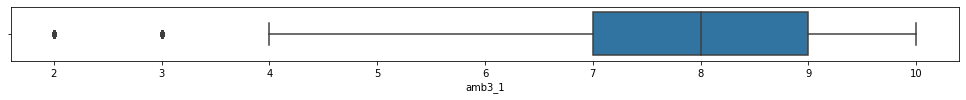

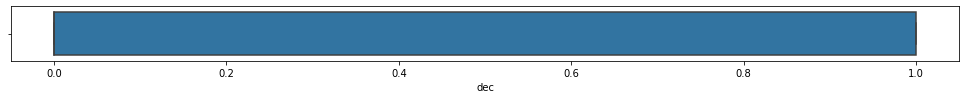

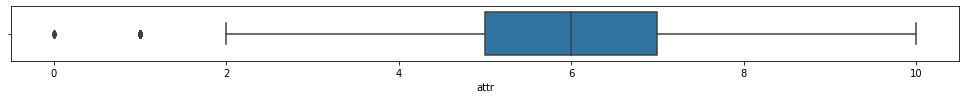

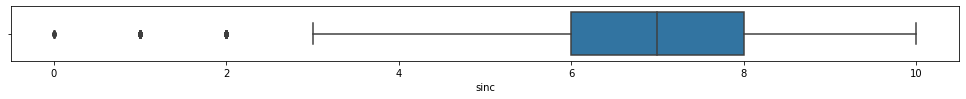

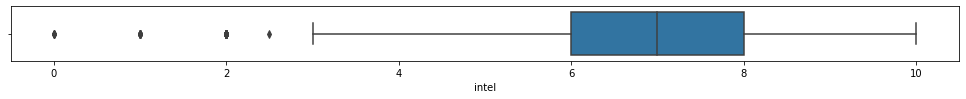

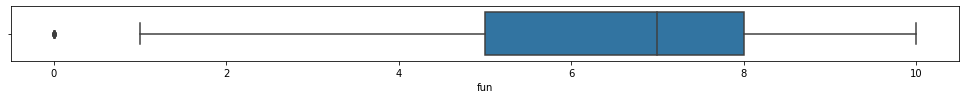

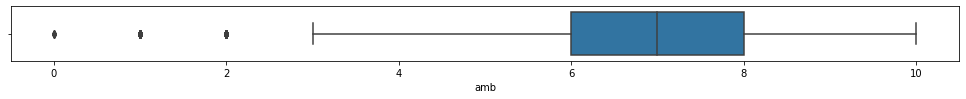

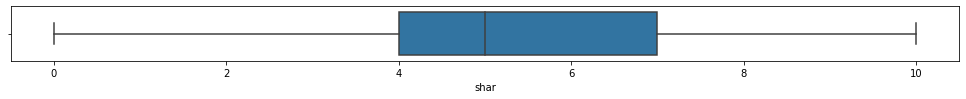

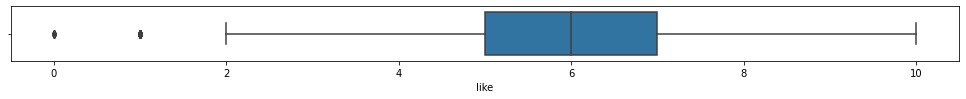

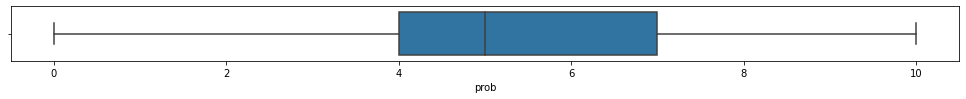

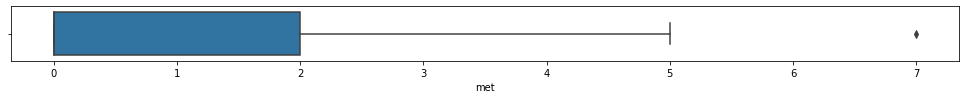

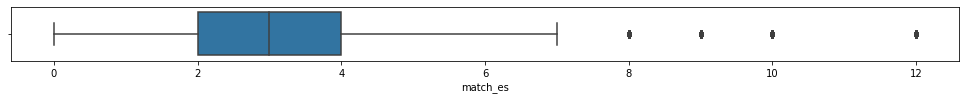

In [22]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

- As we can see there are several columns wth outliers. 

## Visualizations

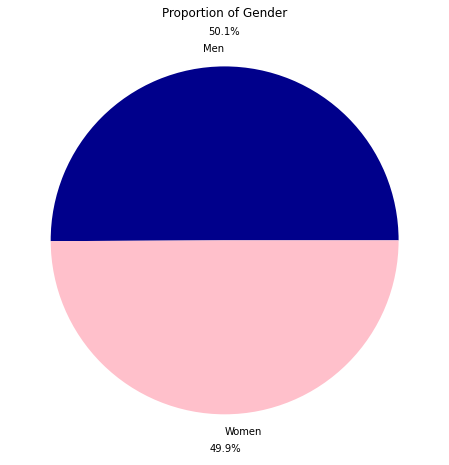

In [23]:
sizes = dict(data['gender'].value_counts())

colors= ['darkblue', 'pink']
plt.figure(figsize=(12, 8))
plt.title("Proportion of Gender")
plt.pie(sizes.values(), labels=['Men', 'Women'], autopct="%.1f%%", pctdistance=1.2, colors=colors)

plt.show()

In [24]:
# lets create a function to plot va;ues for men and women
def comp_bar_chart(df, name1, name2, title):
    
    trace1 = go.Bar(
        y=list(df.iloc[1]),
        x=df.columns.values,
        name=name1,
        marker=dict(
            color='darkblue'
        )
    )
    trace2 = go.Bar(
        y=list(df.iloc[0]),
        x=df.columns.values,
        name=name2,
        marker=dict(
            color='pink'
        )
    )

    data = [trace1, trace2]
    layout = go.Layout(
        title=title,
        font=dict(
            size=16
        ),
        legend=dict(
            font=dict(
                size=16
            )
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='barchart')
    

In [25]:
# What people look for in a partner
atributes_set1 = data[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']
atributes_set1.columns = cols

comp_bar_chart(atributes_set1, 'Men', 'Women', 'What subjects look for in the Opposite Sex')

In [26]:
atributes_set2 = data[['gender','attr2_1', 'sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']
atributes_set2.columns = cols

comp_bar_chart(atributes_set2, 'Men', 'Women', 'What subjects think the Opposite Sex looks for in a date')

In [27]:
atributes_set3 = data[['gender','attr3_1', 'sinc3_1','intel3_1','fun3_1','amb3_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous']
atributes_set3.columns = cols

comp_bar_chart(atributes_set3, 'Men', 'Women', 'How the subject thinks they Measure Up')

In [28]:
atributes_set4 = data[['gender','age', 'imprace', 'imprelig', 'exphappy',  'match_es']].groupby('gender').mean()
cols = ['Age', 'Importance of Race','Importance of Religion','Expected Happiness Level','Expected Matches']
atributes_set4.columns = cols

comp_bar_chart(atributes_set4, 'Men', 'Women', 'Additional Attributes')


    

In [29]:
atributes_set5 = data[['gender', 'sports','tvsports', 'exercise', 'dining', 'museums',  'art', 'hiking', 'gaming', 'clubbing', 
                       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']].groupby('gender').mean()
cols = ['Playing Sports','Watching Sports','Exercising', 'Eating Out','Museums', 'Art', 'Hiking', 'Gaming', 'Clubbing', 
        'Reading', 'Watching TV', 'Theater', 'Movies', 'Concerts', 'Music', 'Shopping', 'Yoga']
atributes_set5.columns = cols

comp_bar_chart(atributes_set5, 'Men', 'Women', 'Interest in Activities')



## We will prepare our data so that we can run our models on it.

In [30]:
# we will replace all null values with the mean values of their columns
data = data.fillna(data.mean())

In [31]:
data.shape

(6816, 71)

In [32]:
# checking for any missing values
data.isnull().any().value_counts()

False    71
dtype: int64

#### Encoding our categorical object datatypes using one hot encoding

We will be using one hot encoding because we cannot rank some types of categories as either better or worse than the other therefore assigning integers to them would not be correct. Although some machine learning algorithms can work directly with categorical data depending on implementation, such as a decision tree, but most require any inputs or outputs variables to be a number, or numeric in value. This means that any categorical data must be mapped to integers.
One hot encoding is useful for data that has no relationship to each other. Machine learning algorithms treat the order of numbers as an attribute of significance. In other words, they will read a higher number as better or more important than a lower number. While this is helpful for some ordinal situations, some input data does not have any ranking for category values, and this can lead to issues with predictions and poor performance. That’s when one hot encoding saves the day.

In [33]:
dummy_dataframe_flags = pd.get_dummies(data, columns = ['race', 'goal', 'date'])

In [34]:
data = data.drop(['race', 'goal', 'date'], axis=1)

In [35]:
data = data.merge(dummy_dataframe_flags, how='left')

### Outlier Treatment
- Anomaly detection is the process of finding the outliers in the data, i.e. points that are significantly different from the majority of the other data points.

- Large, real-world datasets may have very complicated patterns that are difficult to detect by just looking at the data. That's why the study of anomaly detection is an extremely important application of Machine Learning.

In [36]:
ifd = IsolationForest(n_estimators=50, warm_start=True)
ifd.fit(data)  

print(data.shape)

data_treated = data[ifd.predict(data) == 1]

print(data_treated.shape)

(6816, 86)
(6112, 86)


In [37]:
# Prepping the data
x = data_treated.drop(columns=['match'],axis=1).values
y = data_treated['match'].values

### Visualization post Outlier Treatment

In [38]:
# What people look for in a partner
atributes_set11 = data_treated[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']
atributes_set1.columns = cols

comp_bar_chart(atributes_set1, 'Men', 'Women', 'What subjects look for in the Opposite Sex')

In [39]:
atributes_set22 = data_treated[['gender','attr2_1', 'sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']
atributes_set2.columns = cols

comp_bar_chart(atributes_set2, 'Men', 'Women', 'What subjects think the Opposite Sex looks for in a date')

In [40]:
atributes_set33 = data_treated[['gender','attr3_1', 'sinc3_1','intel3_1','fun3_1','amb3_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous']
atributes_set3.columns = cols

comp_bar_chart(atributes_set3, 'Men', 'Women', 'How the subject thinks they Measure Up')

In [41]:
atributes_set44 = data_treated[['gender','age', 'imprace', 'imprelig', 'exphappy',  'match_es']].groupby('gender').mean()
cols = ['Age', 'Importance of Race','Importance of Religion','Expected Happiness Level','Expected Matches']
atributes_set4.columns = cols

comp_bar_chart(atributes_set4, 'Men', 'Women', 'Additional Attributes')



In [42]:
atributes_set55 = data_treated[['gender', 'sports','tvsports', 'exercise', 'dining', 'museums',  'art', 'hiking', 'gaming', 'clubbing', 
                       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']].groupby('gender').mean()
cols = ['Playing Sports','Watching Sports','Exercising', 'Eating Out','Museums', 'Art', 'Hiking', 'Gaming', 'Clubbing', 
        'Reading', 'Watching TV', 'Theater', 'Movies', 'Concerts', 'Music', 'Shopping', 'Yoga']
atributes_set5.columns = cols

comp_bar_chart(atributes_set5, 'Men', 'Women', 'Interest in Activities')



#### SMOTE

In [43]:
# Define the resampling method
method = SMOTE()

In [44]:
# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(x,y)

In [45]:
def plot_graph(x:np.ndarray, y:np.ndarray):
    plt.figure(figsize=(7,7))
    plt.scatter(x[y==0,1],x[y==0,2], label=' 0')
    plt.scatter(x[y==1,1],x[y==1,2], label=' 1', c='r')
    plt.legend()
    return plt.show()

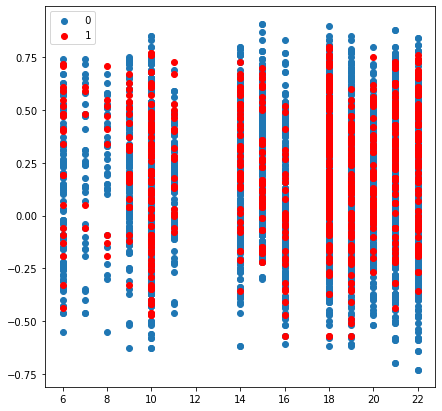

In [46]:
plot_graph(x,y)

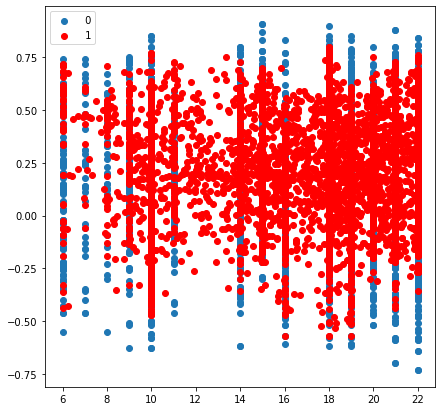

In [47]:
plot_graph(X_resampled,y_resampled)

##### Using ExtraTreesClassifier as a feature selection method
In the case of classification, forward feature selection may be replaced by fitting a decision tree-based classifier. ExtraTreesClassifier fits multiple decision trees. Every tree has access to a subset of given variables.

In [48]:
x_copy = data_treated.drop(columns=['match'],axis=1)
y_copy = data_treated['match']

estimator = ExtraTreesClassifier(n_estimators = 100)
featureSelection = SelectFromModel(estimator)
featureSelection.fit(x, y)

selectedFeatures = featureSelection.transform(x)
selectedFeatures

x_copy.columns[featureSelection.get_support()]

Index(['int_corr', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun',
       'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o',
       'shar_o', 'like_o', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb',
       'shar', 'like', 'prob'],
      dtype='object')

In [49]:
x_new = data_treated[['int_corr', 'age_o', 'pf_o_att', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o',
       'like_o', 'dec', 'attr', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']].values
y_new = data_treated['match'].values


##### We will also prepare our original data for benchmark results. We will create dummy variables for all the object type columns and fill the missing values with mean values. 

In [50]:
data_og = data_og.fillna(data_og.mean())

In [51]:
dummy_dataframe_flags = pd.get_dummies(data_og, columns = ['field', 'undergra', 'race', 'from', 'goal', 'date', 'career'])
data_og = data_og.drop(['field', 'undergra', 'race', 'from', 'goal', 'date', 'career'], axis=1)
data_og = data_og.merge(dummy_dataframe_flags, how='left')

In [52]:
# Prepping the data
x_og = data_og.drop(columns=['match'],axis=1).values
y_og  = data_og['match'].values

In [53]:
data_og.shape

(6816, 1092)

# PCA

We will conduct PCA using three models. For each of these 3 models we will first try with 3 attributes and then 10.

In [54]:
 def pca_model_results(x, y, model,comp):
    pca = PCA(n_components=comp)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    X_train = pca.fit_transform(X_train)
    X_test = pca.fit_transform(X_test)
    
    # fitting the model
    model.fit(X_train, y_train)
    
    # obtaining model predictions from the test data
    y_predicted = model.predict(X_test)
    
    print('PCA Explained Variance ratio: ', pca.explained_variance_ratio_)
    
    # printing the classifcation report and confusion matrix
    print('Classification report:\n', classification_report(y_test, y_predicted))
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
    print('Confusion matrix:\n', conf_mat)
    

In [55]:
model = LogisticRegression()

# benchmark data results
pca_model_results(x_og,y_og,model,3) 

PCA Explained Variance ratio:  [8.64639374e-01 1.35329839e-01 2.17161496e-05]
Classification report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1706
           1       0.00      0.00      0.00       339

    accuracy                           0.83      2045
   macro avg       0.42      0.50      0.45      2045
weighted avg       0.70      0.83      0.76      2045

Confusion matrix:
 [[1706    0]
 [ 339    0]]


In [56]:
# benchmark data results
pca_model_results(x_og,y_og,model,10) 

PCA Explained Variance ratio:  [8.57683994e-01 1.42282887e-01 2.37332903e-05 2.30277462e-06
 1.49360547e-06 9.02683371e-07 4.45607473e-07 3.88566657e-07
 3.84684070e-07 3.16807942e-07]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73      1719
           1       0.15      0.32      0.20       326

    accuracy                           0.60      2045
   macro avg       0.49      0.49      0.47      2045
weighted avg       0.73      0.60      0.65      2045

Confusion matrix:
 [[1120  599]
 [ 222  104]]


In [57]:
# our cleaned data results
pca_model_results(x,y,model,3) 

PCA Explained Variance ratio:  [0.25260754 0.14308713 0.09162236]
Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1557
           1       0.00      0.00      0.00       277

    accuracy                           0.85      1834
   macro avg       0.42      0.50      0.46      1834
weighted avg       0.72      0.85      0.78      1834

Confusion matrix:
 [[1557    0]
 [ 277    0]]


In [58]:
# our cleaned data results
pca_model_results(x,y,model,10)

PCA Explained Variance ratio:  [0.23632306 0.15700467 0.091158   0.0508964  0.04415126 0.04106134
 0.03699869 0.03400902 0.03268846 0.03053123]
Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1567
           1       0.00      0.00      0.00       267

    accuracy                           0.85      1834
   macro avg       0.43      0.50      0.46      1834
weighted avg       0.73      0.85      0.79      1834

Confusion matrix:
 [[1567    0]
 [ 267    0]]


In [59]:
model = DecisionTreeClassifier()

# benchmark data results
pca_model_results(x_og,y_og,model,3)  
 

PCA Explained Variance ratio:  [8.56925089e-01 1.43042360e-01 2.30649036e-05]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      1697
           1       0.19      0.23      0.21       348

    accuracy                           0.70      2045
   macro avg       0.51      0.51      0.51      2045
weighted avg       0.72      0.70      0.71      2045

Confusion matrix:
 [[1356  341]
 [ 269   79]]


In [60]:
# benchmark data results
pca_model_results(x_og,y_og,model,10)  
 

PCA Explained Variance ratio:  [8.59311806e-01 1.40655871e-01 2.27441885e-05 2.33072827e-06
 1.39501269e-06 9.43578658e-07 4.66208881e-07 4.06265237e-07
 3.70105593e-07 3.42123627e-07]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      1705
           1       0.14      0.17      0.16       340

    accuracy                           0.69      2045
   macro avg       0.48      0.48      0.48      2045
weighted avg       0.71      0.69      0.70      2045

Confusion matrix:
 [[1346  359]
 [ 281   59]]


In [61]:
# our cleaned data results
pca_model_results(x,y,model,3) 

PCA Explained Variance ratio:  [0.23091508 0.15459736 0.09353437]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1537
           1       0.17      0.19      0.18       297

    accuracy                           0.72      1834
   macro avg       0.51      0.51      0.51      1834
weighted avg       0.73      0.72      0.73      1834

Confusion matrix:
 [[1268  269]
 [ 240   57]]


In [62]:
# our cleaned data results
pca_model_results(x,y,model,10) 

PCA Explained Variance ratio:  [0.23724249 0.16260832 0.10154611 0.0484906  0.04256127 0.04057618
 0.03528328 0.03262443 0.03196172 0.02920326]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      1573
           1       0.12      0.18      0.15       261

    accuracy                           0.70      1834
   macro avg       0.49      0.48      0.48      1834
weighted avg       0.75      0.70      0.72      1834

Confusion matrix:
 [[1240  333]
 [ 214   47]]


In [63]:
model = GaussianNB()

# benchmark data results
pca_model_results(x_og,y_og,model,3) 

PCA Explained Variance ratio:  [8.68494662e-01 1.31474785e-01 2.15745480e-05]
Classification report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1693
           1       0.00      0.00      0.00       352

    accuracy                           0.83      2045
   macro avg       0.41      0.50      0.45      2045
weighted avg       0.69      0.83      0.75      2045

Confusion matrix:
 [[1693    0]
 [ 352    0]]


In [64]:
# benchmark data results
pca_model_results(x_og,y_og,model,10)  

PCA Explained Variance ratio:  [8.71357104e-01 1.28613604e-01 2.09805147e-05 1.99356717e-06
 1.23894224e-06 7.95943347e-07 4.09932349e-07 3.56916543e-07
 3.37846093e-07 3.10557121e-07]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      1725
           1       0.35      0.02      0.04       320

    accuracy                           0.84      2045
   macro avg       0.60      0.51      0.47      2045
weighted avg       0.77      0.84      0.78      2045

Confusion matrix:
 [[1714   11]
 [ 314    6]]


In [65]:
# our cleaned data results
pca_model_results(x,y,model,3) 

PCA Explained Variance ratio:  [0.2322816  0.15157554 0.10000172]
Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1558
           1       0.00      0.00      0.00       276

    accuracy                           0.85      1834
   macro avg       0.42      0.50      0.46      1834
weighted avg       0.72      0.85      0.78      1834

Confusion matrix:
 [[1558    0]
 [ 276    0]]


In [66]:
# our cleaned data results
pca_model_results(x,y,model,10) 

PCA Explained Variance ratio:  [0.25255531 0.14709738 0.0973697  0.05153492 0.04346039 0.03925864
 0.03572828 0.0324819  0.03060259 0.02883286]
Classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.92      1548
           1       0.00      0.00      0.00       286

    accuracy                           0.84      1834
   macro avg       0.42      0.50      0.46      1834
weighted avg       0.71      0.84      0.77      1834

Confusion matrix:
 [[1548    0]
 [ 286    0]]


In [67]:
# defining the KNeighbirs model
m = KNeighborsClassifier(n_neighbors = 3)

# benchmark results
pca_model_results(x_og,y_og,m,3)

PCA Explained Variance ratio:  [8.56989394e-01 1.42978454e-01 2.30813055e-05]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.63      0.71      1697
           1       0.17      0.37      0.23       348

    accuracy                           0.58      2045
   macro avg       0.50      0.50      0.47      2045
weighted avg       0.72      0.58      0.63      2045

Confusion matrix:
 [[1061  636]
 [ 218  130]]


In [68]:
# benchmark data results
pca_model_results(x_og,y_og,model,10)  

PCA Explained Variance ratio:  [8.60378002e-01 1.39589495e-01 2.30453807e-05 2.36675997e-06
 1.41447641e-06 8.93265777e-07 4.64588558e-07 4.09191374e-07
 3.78006865e-07 3.25006460e-07]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      1697
           1       0.36      0.03      0.05       348

    accuracy                           0.83      2045
   macro avg       0.60      0.51      0.48      2045
weighted avg       0.75      0.83      0.76      2045

Confusion matrix:
 [[1681   16]
 [ 339    9]]


In [69]:
# cleaned data results 
pca_model_results(x,y,m,3)

PCA Explained Variance ratio:  [0.23864347 0.1535046  0.09575297]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1551
           1       0.24      0.11      0.15       283

    accuracy                           0.81      1834
   macro avg       0.55      0.52      0.52      1834
weighted avg       0.76      0.81      0.78      1834

Confusion matrix:
 [[1454   97]
 [ 252   31]]


In [70]:
# our cleaned data results
pca_model_results(x,y,model,10) 

PCA Explained Variance ratio:  [0.24041226 0.15159161 0.10317494 0.04936077 0.04381477 0.03967921
 0.0367846  0.03401933 0.03161687 0.02889024]
Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1567
           1       0.29      0.01      0.01       267

    accuracy                           0.85      1834
   macro avg       0.57      0.50      0.47      1834
weighted avg       0.77      0.85      0.79      1834

Confusion matrix:
 [[1562    5]
 [ 265    2]]


# Machine Learning Models

We create our own function to run various machine learning models on our data

In [71]:
def get_model_results(x, y, model, testsize):
    
    # splitting the set
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=testsize, random_state = 42)
    
    # fitting the model
    model.fit(X_train, y_train)
    
    # obtaining model predictions from the test data
    y_predicted = model.predict(X_test)
    
    # comparing y_test to predictions and obtaining performance metrics
    # printing the classifcation report and confusion matrix
    print('Classification report:\n', classification_report(y_test, y_predicted))
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
    print('Confusion matrix:\n', conf_mat)
    
    # checking the accuracy of our model
    print(f'Accuracy Score:\n{accuracy_score(y_test, y_predicted):0.3f}')
    
    # getting AUC score
    probs = model.predict_proba(X_test)
    
    print(f'AUC:\n{roc_auc_score(y_test,probs[:,1])}')
    
    # printing the ROC curve
    
    print('ROC:\n')
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

### LOGISTIC REGRESSION

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1697
           1       0.57      0.24      0.33       348

    accuracy                           0.84      2045
   macro avg       0.72      0.60      0.62      2045
weighted avg       0.81      0.84      0.81      2045

Confusion matrix:
 [[1636   61]
 [ 266   82]]
Accuracy Score:
0.840
AUC:
0.8182170700153754
ROC:



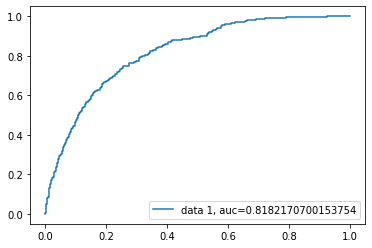

In [72]:
# defining the Logistic Regression model
model = LogisticRegression()

# calling our function
get_model_results(x_og,y_og,model,0.3)

##### Our cleaned and narrowed data results

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1577
           1       0.70      0.63      0.66       257

    accuracy                           0.91      1834
   macro avg       0.82      0.79      0.80      1834
weighted avg       0.91      0.91      0.91      1834

Confusion matrix:
 [[1508   69]
 [  96  161]]
Accuracy Score:
0.910
AUC:
0.9510522121251749
ROC:



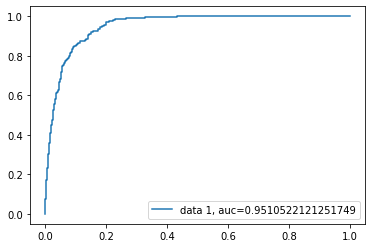

In [73]:
get_model_results(x,y,model,0.3)

#### Using Resampled Data

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      1575
           1       0.88      0.96      0.92      1536

    accuracy                           0.92      3111
   macro avg       0.92      0.92      0.92      3111
weighted avg       0.92      0.92      0.92      3111

Confusion matrix:
 [[1380  195]
 [  69 1467]]
Accuracy Score:
0.915
AUC:
0.9635193452380952
ROC:



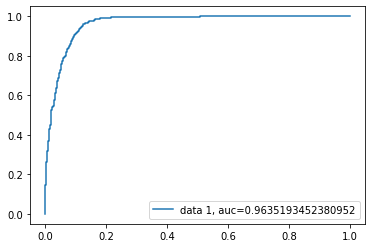

In [74]:
get_model_results(X_resampled,y_resampled,model,0.3)

#### Using Extra Trees Classifier Data

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1577
           1       0.67      0.65      0.66       257

    accuracy                           0.91      1834
   macro avg       0.81      0.80      0.80      1834
weighted avg       0.90      0.91      0.91      1834

Confusion matrix:
 [[1493   84]
 [  89  168]]
Accuracy Score:
0.906
AUC:
0.9503687492135241
ROC:



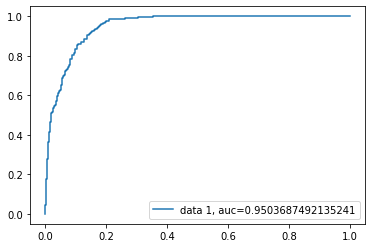

In [75]:
# Extra Trees Classifier Results
get_model_results(x_new,y_new,model,0.3)

### DECISION TREES

##### Benchmark Results

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      1697
           1       0.66      0.61      0.63       348

    accuracy                           0.88      2045
   macro avg       0.79      0.77      0.78      2045
weighted avg       0.88      0.88      0.88      2045

Confusion matrix:
 [[1586  111]
 [ 136  212]]
Accuracy Score:
0.879
AUC:
0.771892928020374
ROC:



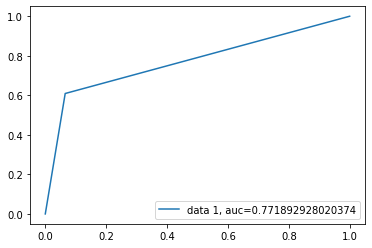

In [76]:
# defining the descision tree model
model = DecisionTreeClassifier()

# calling our function
get_model_results(x_og,y_og,model,0.3)

##### Our cleaned and narrowed data results

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      1577
           1       0.60      0.61      0.60       257

    accuracy                           0.89      1834
   macro avg       0.77      0.77      0.77      1834
weighted avg       0.89      0.89      0.89      1834

Confusion matrix:
 [[1471  106]
 [ 100  157]]
Accuracy Score:
0.888
AUC:
0.7718393541398855
ROC:



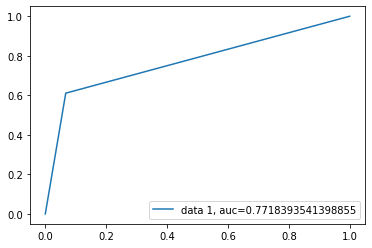

In [77]:
get_model_results(x,y,model,0.3)

#### Using Resampled Data

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      1575
           1       0.93      0.94      0.93      1536

    accuracy                           0.93      3111
   macro avg       0.93      0.93      0.93      3111
weighted avg       0.93      0.93      0.93      3111

Confusion matrix:
 [[1459  116]
 [  87 1449]]
Accuracy Score:
0.935
AUC:
0.9348542906746032
ROC:



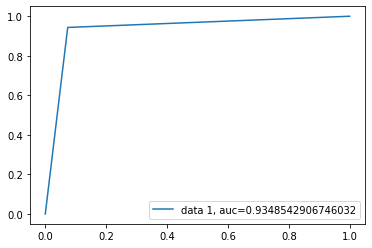

In [78]:
# Smote results
get_model_results(X_resampled,y_resampled,model,0.3)

#### Using Extra Trees Classifier Data

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1577
           1       0.59      0.58      0.59       257

    accuracy                           0.88      1834
   macro avg       0.76      0.76      0.76      1834
weighted avg       0.88      0.88      0.88      1834

Confusion matrix:
 [[1472  105]
 [ 107  150]]
Accuracy Score:
0.884
AUC:
0.758537734801586
ROC:



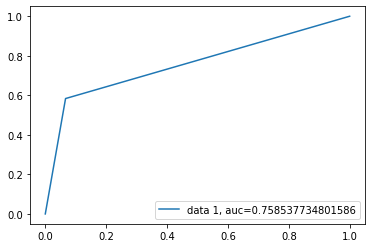

In [79]:
# Extra Trees Classifier Results
get_model_results(x_new,y_new,model,0.3)

### NAIVE BAYES

##### Benchmark Results

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      1697
           1       0.50      0.80      0.62       348

    accuracy                           0.83      2045
   macro avg       0.73      0.82      0.75      2045
weighted avg       0.88      0.83      0.84      2045

Confusion matrix:
 [[1416  281]
 [  68  280]]
Accuracy Score:
0.829
AUC:
0.8913616998218628
ROC:



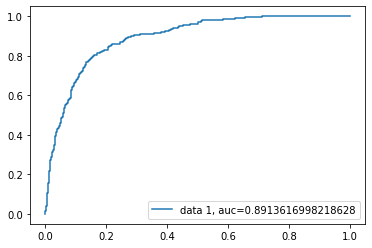

In [80]:
# defining the Naive Bayes Classifier
m = GaussianNB()

# benchmark results
get_model_results(x_og,y_og,m,0.3)

##### Our cleaned and narrowed data results

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.81      0.89      1577
           1       0.44      0.94      0.60       257

    accuracy                           0.83      1834
   macro avg       0.72      0.87      0.75      1834
weighted avg       0.91      0.83      0.85      1834

Confusion matrix:
 [[1274  303]
 [  15  242]]
Accuracy Score:
0.827
AUC:
0.939797280459129
ROC:



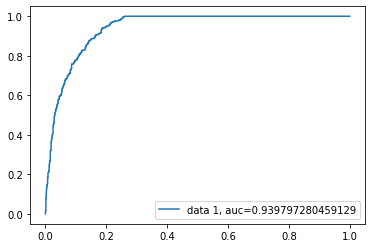

In [81]:
get_model_results(x,y,m,0.3)

##### Using Resampled Data

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      1575
           1       0.93      0.94      0.94      1536

    accuracy                           0.94      3111
   macro avg       0.94      0.94      0.94      3111
weighted avg       0.94      0.94      0.94      3111

Confusion matrix:
 [[1464  111]
 [  87 1449]]
Accuracy Score:
0.936
AUC:
0.9364415922619047
ROC:



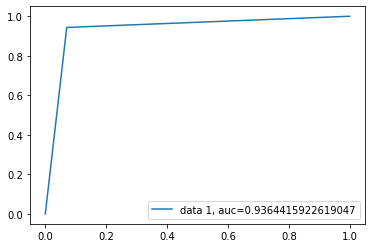

In [82]:
# smote results
get_model_results(X_resampled,y_resampled,model,0.3)

##### Using Extra Trees Classifier Data

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      1577
           1       0.60      0.61      0.61       257

    accuracy                           0.89      1834
   macro avg       0.77      0.77      0.77      1834
weighted avg       0.89      0.89      0.89      1834

Confusion matrix:
 [[1474  103]
 [ 100  157]]
Accuracy Score:
0.889
AUC:
0.772790527253392
ROC:



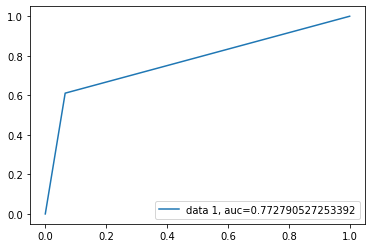

In [83]:
get_model_results(x_new,y_new,model,0.3)

## KNN ALGORITHM

#### Benchmark Results

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      1697
           1       0.38      0.22      0.28       348

    accuracy                           0.81      2045
   macro avg       0.62      0.57      0.58      2045
weighted avg       0.77      0.81      0.78      2045

Confusion matrix:
 [[1570  127]
 [ 270   78]]
Accuracy Score:
0.806
AUC:
0.6359837170395355
ROC:



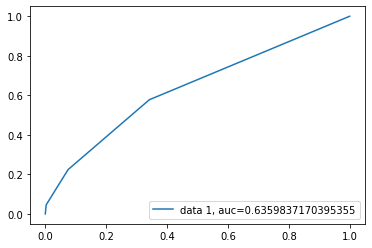

In [84]:
# defining the KNeighbirs model
m = KNeighborsClassifier(n_neighbors = 3)

# calling our function
get_model_results(x_og,y_og,m,0.3)

##### Our cleaned and narrowed data results

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1577
           1       0.29      0.15      0.20       257

    accuracy                           0.83      1834
   macro avg       0.58      0.54      0.55      1834
weighted avg       0.79      0.83      0.81      1834

Confusion matrix:
 [[1484   93]
 [ 219   38]]
Accuracy Score:
0.830
AUC:
0.6148550787216036
ROC:



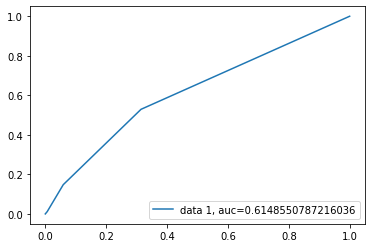

In [85]:
get_model_results(x,y,m,0.3)

#### Using Resampled Data

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1575
           1       0.92      0.94      0.93      1536

    accuracy                           0.93      3111
   macro avg       0.93      0.93      0.93      3111
weighted avg       0.93      0.93      0.93      3111

Confusion matrix:
 [[1454  121]
 [  94 1442]]
Accuracy Score:
0.931
AUC:
0.9309883432539683
ROC:



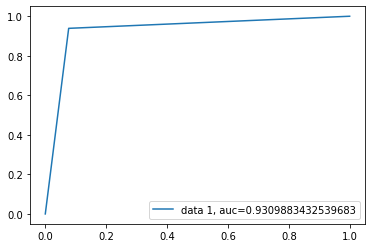

In [86]:
get_model_results(X_resampled,y_resampled,model,0.3)

#### Using Extra Trees Classifier Data

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      1577
           1       0.46      0.34      0.39       257

    accuracy                           0.85      1834
   macro avg       0.68      0.64      0.65      1834
weighted avg       0.84      0.85      0.84      1834

Confusion matrix:
 [[1472  105]
 [ 169   88]]
Accuracy Score:
0.851
AUC:
0.7584797514859767
ROC:



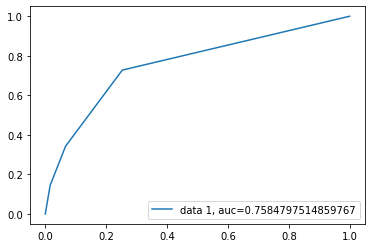

In [87]:
get_model_results(x_new,y_new,m,0.3)

In [88]:
m = KNeighborsClassifier(n_neighbors = 7)

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1697
           1       0.46      0.13      0.20       348

    accuracy                           0.83      2045
   macro avg       0.65      0.55      0.55      2045
weighted avg       0.78      0.83      0.78      2045

Confusion matrix:
 [[1646   51]
 [ 304   44]]
Accuracy Score:
0.826
AUC:
0.6401137233386842
ROC:



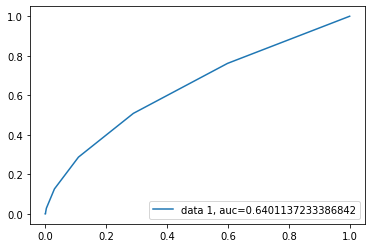

In [89]:
get_model_results(x_og,y_og,m,0.3)

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1577
           1       0.42      0.09      0.15       257

    accuracy                           0.85      1834
   macro avg       0.64      0.53      0.53      1834
weighted avg       0.81      0.85      0.81      1834

Confusion matrix:
 [[1545   32]
 [ 234   23]]
Accuracy Score:
0.855
AUC:
0.6553582752060876
ROC:



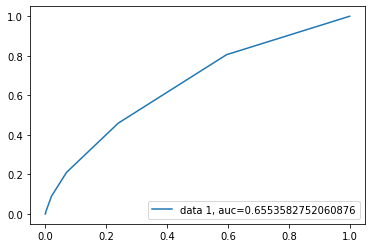

In [90]:
get_model_results(x,y,m,0.3)

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      1575
           1       0.93      0.94      0.93      1536

    accuracy                           0.93      3111
   macro avg       0.93      0.93      0.93      3111
weighted avg       0.93      0.93      0.93      3111

Confusion matrix:
 [[1467  108]
 [  95 1441]]
Accuracy Score:
0.935
AUC:
0.9347898065476189
ROC:



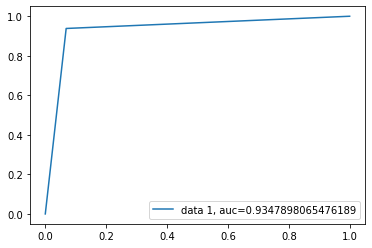

In [91]:
get_model_results(X_resampled,y_resampled,model,0.3)

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1577
           1       0.54      0.26      0.35       257

    accuracy                           0.87      1834
   macro avg       0.71      0.61      0.64      1834
weighted avg       0.84      0.87      0.84      1834

Confusion matrix:
 [[1521   56]
 [ 191   66]]
Accuracy Score:
0.865
AUC:
0.7774908768804483
ROC:



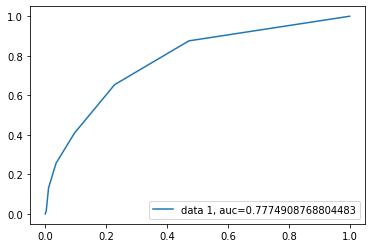

In [92]:
get_model_results(x_new,y_new,m,0.3)